In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
%matplotlib inline

In [1]:
# This is for downloading the YOLOv8 cow face images and labels
#!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="my_api_here")                    #remeber to commit this to public repo
project = rf.workspace("face-cow").project("thecowface")
dataset = project.version(1).download("yolov8")



loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Thecowface-1 in yolov8:: 100%|████████████████████████| 282/282 [00:00<00:00, 603.51it/s]


In [19]:
#pip install ultralytics==8.0.20
# This is just to check the Python environment 
from IPython import display
display.clear_output()
!yolo checks

SyntaxError: invalid syntax (1661027642.py, line 1)

In [9]:
from ultralytics import YOLO
from IPython.display import display, Image

In [1]:
#training the model to segment the cow face using custom dataset 
from ultralytics import YOLO

model = YOLO("yolov8n-seg.pt")  # load a pretrained model (recommended for training)
# Train the model
model.train(data="data.yaml", epochs=100)



WARNING  Ultralytics settings reset to defaults. 
This is normal and may be due to a recent ultralytics package update, but may have overwritten previous settings. 
You may view and update settings directly in 'C:\Users\Fortune\AppData\Roaming\Ultralytics\settings.yaml'
Ultralytics YOLOv8.0.20  Python-3.9.12 torch-1.13.1+cpu CPU
yolo\engine\trainer: task=segment, mode=train, model=yolov8n-seg.yaml, data=data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_co

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

AssertionError: [34m[1mtrain: [0mNo labels found in D:\Fortune\Education\University\111_Spring_Semester\U_P_II\cow_facial_recognition\face_train_data\train\labels.cache, can not start training. See https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data

In [2]:

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="My_api_here")
project = rf.workspace("face-cow").project("thecowface")
dataset = project.version(1).download("yolov8")

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.


label-studio 1.7.1 requires boto3~=1.16.28, but you have boto3 1.24.28 which is incompatible.
label-studio 1.7.1 requires botocore~=1.19.28, but you have botocore 1.27.59 which is incompatible.

  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)



label-studio 1.7.1 requires jsonschema==3.2.0, but you have jsonschema 4.17.3 which is incompatible.


label-studio 1.7.1 requires python-dateutil==2.8.1, but you have python-dateutil 2.8.2 which is incompatible.


label-studio 1.7.1 requires pytz~=2019.3, but you have pytz 2022.7 which is incompatible.
label-studio-converter 0.0.48rc0 requires nltk==3.6.7, but you have nltk 3.7 which is incompatible.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.



  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      Successfully uninstalled idna-3.4
  Attempting uninstall: cycler
    Found existing installation: cycler 0.11.0
    Uninstalling cycler-0.11.0:
      Successfully uninstalled cycler-0.11.0
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Thecowface-1 in yolov8:: 100%|████████████████████████| 282/282 [00:00<00:00, 825.53it/s]


In [18]:
res_plotted = results[0].visualize()
cv2.imshow("result", res_plotted)

AttributeError: 
            'Results' object has no attribute 'visualize'. Valid 'Results' object attributes and properties are:

            Attributes:
                boxes (Boxes, optional): A Boxes object containing the detection bounding boxes.
                masks (Masks, optional): A Masks object containing the detection masks.
                probs (torch.Tensor, optional): A tensor containing the detection class probabilities.
                orig_shape (tuple, optional): Original image size.
            

In [ ]:
################################## Cow Face Segmentation Above ######################### 

In [ ]:
################################## Cow Face Identification below ######################### 

In [15]:
# import the videos to read each frame 
cap = cv2.VideoCapture("DATA/test/c22/IMG_3751.MOV")

In [16]:
# total number of frames
num_frame = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

In [2]:
# display image function
def show_pic(img_cross):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    ax.imshow(img_cross, cmap = "gray")


In [18]:
#getting the frames from each video
def get_frames(num_frame):
    for frame in range(num_frame//2):
        ret, img = cap.read()
        # this rotates the image before writing to file
        rotated_img = cv2.rotate(img, cv2.ROTATE_180)        
        if ret == False:
            break
        else:
            path = r"DATA/test/c22"
            name = f'/b_c{frame + 1}.jpg' 
            # write the file
            cv2.imwrite(f'{path}{name}', rotated_img)
            

In [6]:
# this call will write the images to our training folder 
get_frames(num_frame=num_frame)
cap.release()

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode="nearest"                                
                                )

In [5]:
image_gen.flow_from_directory("DATA/train/")

Found 13308 images belonging to 22 classes.


In [7]:
# we'll use this shape for all the images 
input_shape = (550, 960, 3)

In [8]:
the_cow = cv2.imread('DATA/train/c1/a_c102.jpg')
the_cow = cv2.cvtColor(the_cow, cv2.COLOR_BGR2RGB)

In [9]:
the_cow.shape

(3840, 2160, 3)

In [10]:
resized = cv2.resize(the_cow, (550, 960), interpolation = cv2.INTER_AREA)

In [37]:
resized.shape

(960, 550, 3)

In [2]:
show_pic(image_gen.random_transform(resized))

In [12]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Dense

In [13]:
model = Sequential()
# adding our convulutional nueral network layers 
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape, activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Flatten())

model.add(Dense(128))
model.add(Activation("relu"))

# the dropout layer reduces overfitting by randomly turning off nuerons during training 
model.add(Dropout(0.5))

# the output is binary, either cow1 or cow.. hence Dense layer is just one
model.add(Dense(1))
model.add(Activation("sigmoid"))
          
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"]
             )

In [3]:
model.summary()

In [15]:
batch_size = 16
# here we are just pointing the iterator to the path with the training data
train_img_gen = image_gen.flow_from_directory("DATA/train/",
                                             target_size=input_shape[:2],
                                             batch_size=batch_size,
                                             class_mode="categorical")

Found 13308 images belonging to 22 classes.


In [4]:
# to see how the data classes will be presented 
train_img_gen.class_indices

In [17]:
test_img_gen = image_gen.flow_from_directory("DATA/test/",
                                             target_size=input_shape[:2],
                                             batch_size=batch_size,
                                             class_mode="categorical")

Found 3269 images belonging to 22 classes.


In [18]:
# training the model on our images 
results = model.fit(train_img_gen, epochs=5, steps_per_epoch=150,
                             validation_data=test_img_gen, validation_steps=12)

Epoch 1/5
150/150 [==============================] - 1107s 7s/step - loss: 0.2830 - accuracy: 0.9409 - val_loss: 0.1895 - val_accuracy: 0.9545
Epoch 2/5
150/150 [==============================] - 1249s 8s/step - loss: 0.1934 - accuracy: 0.9545 - val_loss: 0.1854 - val_accuracy: 0.9545
Epoch 3/5
150/150 [==============================] - 1189s 8s/step - loss: 0.1926 - accuracy: 0.9545 - val_loss: 0.1864 - val_accuracy: 0.9545
Epoch 4/5
150/150 [==============================] - 1121s 7s/step - loss: 0.1921 - accuracy: 0.9545 - val_loss: 0.1888 - val_accuracy: 0.9545
Epoch 5/5
150/150 [==============================] - 1079s 7s/step - loss: 0.1917 - accuracy: 0.9545 - val_loss: 0.1858 - val_accuracy: 0.9545


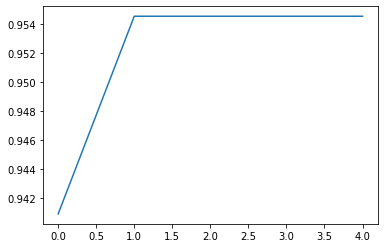

In [28]:
# saving the model 
#model.save("Cow_model.h5")
# now we evaluate the model 
plt.plot(results.history["accuracy"])

In [74]:
import tensorflow.compat.v2 as tf
from keras.preprocessing import image

# the_cow_1 = cv2.imread('DATA/train/c1/a_c102.jpg')

# the_cow_1 = image.load_img(the_cow_1, target_size=(960, 550))

# the_cow_1 = image.img_to_array(the_cow_1)

# the_cow_1 = np.expand_dims(the_cow_1, axis=0)
# the_cow_1 = the_cow_1/255

the_cow_1 = tf.keras.utils.load_img('DATA/test/fake/false3.jpg', target_size=(550, 960))
input_arr = tf.keras.utils.img_to_array(the_cow_1)
input_arr = np.array([input_arr])  # Convert single image to a batch.
input_arr = input_arr/255


In [5]:
train_img_gen.class_indices

In [75]:
#prediction_prob = model.predict(the_cow_1)
#predictions = model.predict_classes(input_arr)

predicted = np.argmax(model.predict(input_arr),axis=1)

1/1 [==============================] - 0s 171ms/step


In [76]:
print(predicted)

[0]
